#  DSP LAB Experiment 5
Author: P. Ramyashri <br>
Email: pramyshri.191ee138@gmail.com <br>
Roll: 191EE138 <br>
Date: 30/10/2021<br>

GITHUB LINK:https://github.com/ramyashri1887/DSP-LAB 

In [92]:
#imports 
import numpy as np
import IPython
from IPython.display import Audio , display, Javascript
import scipy
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks, chirp, spectrogram
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import control

#libraries used 

## Problem 1. (Butterworth filter design)

In [123]:
#constructing a signal 
alpha=1+138%4 #3
Fs=720
T=1/Fs
Wp = 10*2*np.pi
Ws = 20*2*np.pi
pass_ripple = alpha
stop_ripple = 40
wp = (2/T) * np.tan(Wp/(Fs*2))
ws = (2/T) * np.tan(Ws/(Fs*2))
N, wc=sp.buttord(wp, ws, pass_ripple, stop_ripple, analog=True)
print(N)
b, a = sp.butter(N, wc, btype='low', analog=True, output='ba')
print(b)
print(a)

bd, ad=sp.bilinear(b, a, fs=Fs)

print(control.TransferFunction(b, a, dt=True))

7
[3.89242666e+12]
[1.00000000e+00 2.82638973e+02 3.99423944e+04 3.63009045e+06
 2.28307598e+08 9.93671549e+09 2.78129237e+11 3.89242666e+12]

                                               3.892e+12
--------------------------------------------------------------------------------------------------------
z^7 + 282.6 z^6 + 3.994e+04 z^5 + 3.63e+06 z^4 + 2.283e+08 z^3 + 9.937e+09 z^2 + 2.781e+11 z + 3.892e+12



<Figure size 720x720 with 0 Axes>

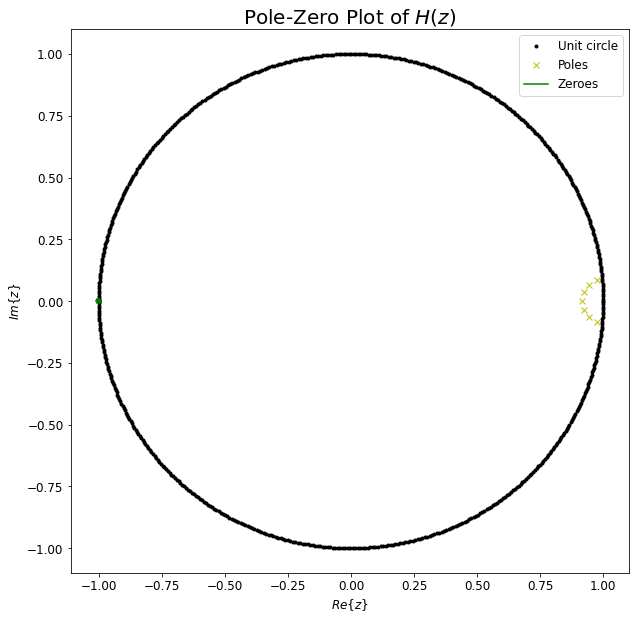

<Figure size 720x720 with 0 Axes>

In [114]:
plt.rcParams.update({
    "figure.figsize": (10,10),
    "font.size": 12})
zeros, poles, _ = sp.tf2zpk(bd, ad)

cir = np.arange(0, 2*np.pi, 0.01)

plt.plot(np.cos(cir), np.sin(cir), 'k.', label='Unit circle')
plt.plot(np.real(poles), np.imag(poles), 'yx', label='Poles')
plt.plot(np.real(zeros), np.imag(zeros), 'g', label='Zeroes')
plt.legend()
plt.title(r'Pole-Zero Plot of $H(z)$',fontsize = 20)

plt.xlabel(r'$Re\{z\}$')
plt.ylabel(r'$Im\{z\}$')
plt.savefig('q1p1.png')
plt.figure()

<Figure size 864x432 with 0 Axes>

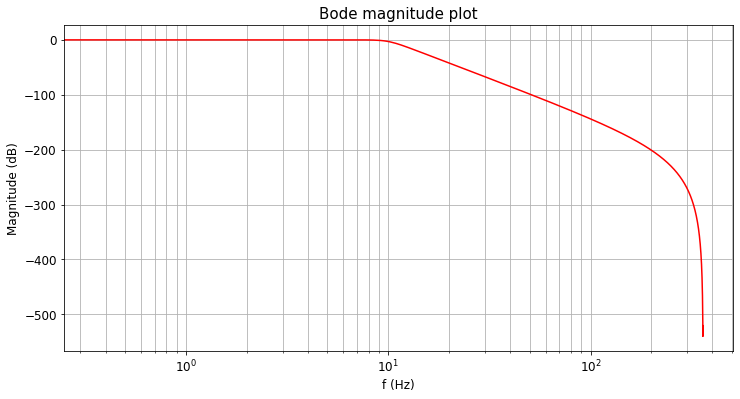

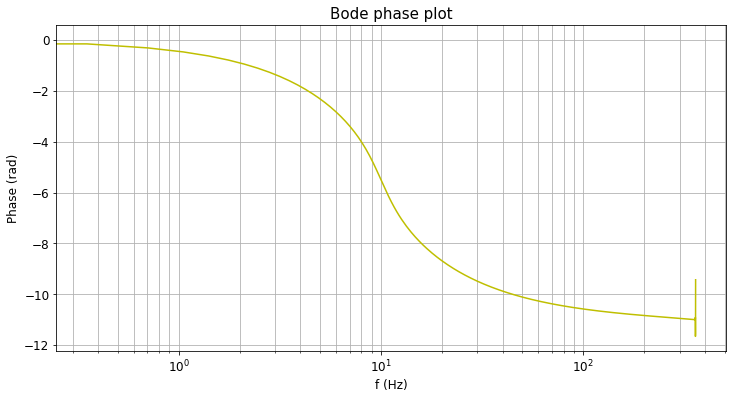

<Figure size 864x432 with 0 Axes>

In [109]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})
freqs, H = sp.freqz(bd, ad, 1024)

plt.semilogx(freqs*(Fs/(2*np.pi)), 20*np.log10(np.abs(H)),"r")
plt.xlabel('f (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Bode magnitude plot',fontsize = 15)
plt.grid(True, which='both')
plt.savefig('q1p2.png')
plt.figure()

plt.semilogx(freqs*(Fs/(2*np.pi)), np.unwrap(np.angle(H)),"y")
plt.xlabel('f (Hz)')
plt.ylabel('Phase (rad)')
plt.title('Bode phase plot',fontsize = 15)
plt.grid(True, which='both', ls='-')
plt.savefig('q1p3.png')
plt.figure()

720


<Figure size 864x432 with 0 Axes>

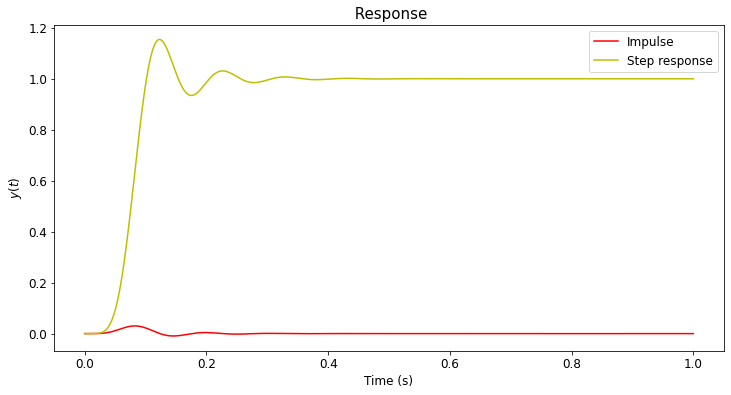

<Figure size 864x432 with 0 Axes>

In [124]:
t =np.linspace(0, 1, Fs)

print(len(t))
deltan=np.hstack((np.array([1]), np.zeros((Fs-1))))

un=np.ones((Fs))

yf_i = sp.lfilter(bd, ad, deltan)
yf_s = sp.lfilter(bd, ad, un)

plt.plot(t,yf_i,"r", label="Impulse")
plt.plot(t,yf_s,"y",label="Step response")

plt.xlabel('Time (s)')
plt.ylabel(r'$y(t)$')
plt.title(' Response',fontsize = 15)

plt.savefig('q1p5.png')
leg = plt.legend()

plt.figure()


## Problem 2. (Filtering) 

<Figure size 864x432 with 0 Axes>

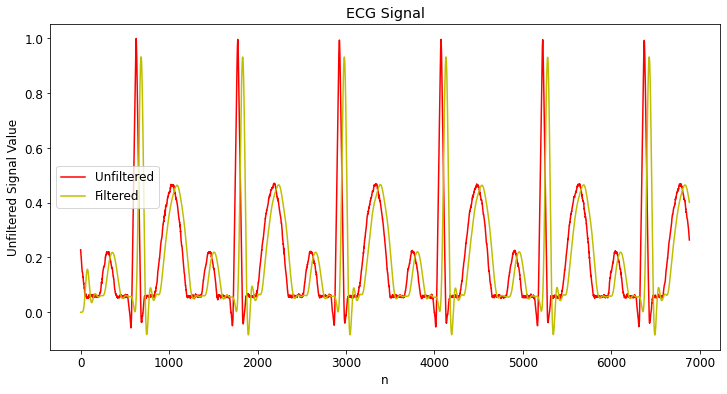

<Figure size 864x432 with 0 Axes>

In [129]:
signal = np.loadtxt('ECG_Data.txt')

filtered_signal = sp.lfilter(bd, ad, signal)

plt.plot(signal,"r", label="Unfiltered")
plt.plot(filtered_signal,"y", label="Filtered")

plt.title('ECG Signal')
plt.xlabel('n')
plt.ylabel('Unfiltered Signal Value')
plt.savefig('q2p1.png')
plt.legend()
plt.figure()


<Figure size 864x432 with 0 Axes>

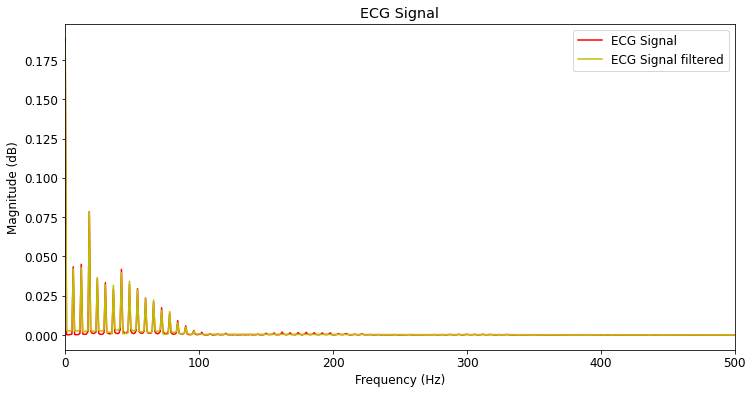

<Figure size 864x432 with 0 Axes>

In [132]:
fft_signal = fft(signal)/len(signal)
fft_filtered_signal = fft(filtered_signal)/len(filtered_signal)
f = np.arange(len(filtered_signal))



f = np.arange(len(signal))
plt.plot(f, np.abs(fft_signal),"r",label="ECG Signal")
plt.plot(f, np.abs(fft_filtered_signal),"y",label="ECG Signal filtered")

plt.title('ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim([0,500])
plt.savefig('q2p3.png')
plt.legend()
plt.figure()


## Problem 3. (Filtering — Time-Frequency Analysis)


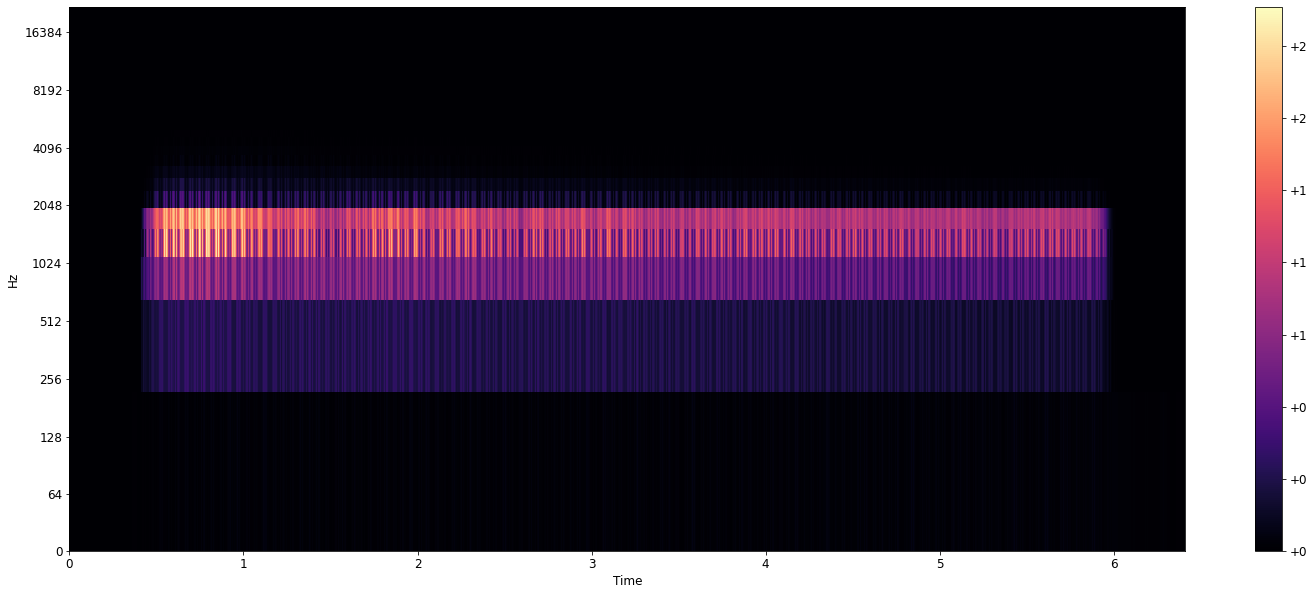

In [133]:
signal, sr1 = librosa.load("instru3.wav",sr =44100 )
fs=44000 #sampling rate

#spectrogram plot definition 
def plot_spectogram(data,sr,hop_length, y_axis="log"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(data,y_axis=y_axis,x_axis="time",hop_length=hop_length, sr=sr)
    plt.colorbar(format="%+2.f")

FRAME_SIZE=100 #powers of two , for reasons like spectral leakage 
HOP_SIZE=90 #same , powers of 2
x=librosa.stft(signal,n_fft=FRAME_SIZE,hop_length=HOP_SIZE, window="hamming")
#finding the abs value to plot a spectogram 
x_spec= abs(x)**2
#converting to log scale, for begtre visualisation 
x_log_spec=librosa.power_to_db(x_spec)
plot_spectogram(x_spec,fs,HOP_SIZE,y_axis="log")

782.9679272379129

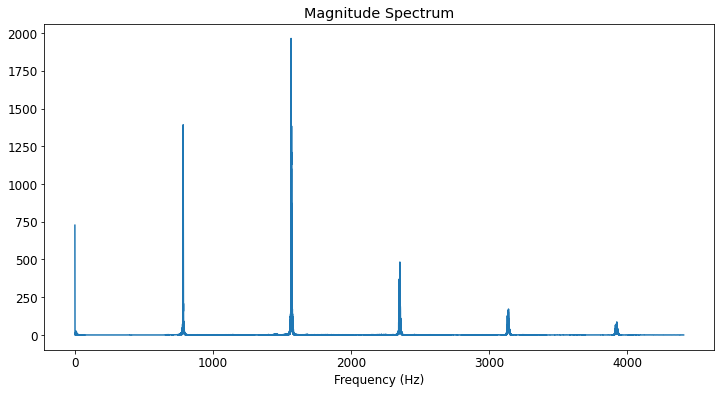

In [140]:
def plot_magnitude_spectrum_trial(signal, sr, title, f_ratio=1, thold = 0, trl=0):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)

    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)
    X_peaks,_ = sp.find_peaks(X_mag[:f_bins],threshold=thold)
    X_maxpeak = np.max(X_mag[X_peaks])
    X_sigpeak = int(X_maxpeak/4)
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)
    for i in range(0,f_bins):
        if X_mag[i] >= X_sigpeak:
            F_sigpeak = i
            if f[F_sigpeak] > 0:
                return(f[F_sigpeak])
#     print(f[F_maxpeak])
#    print(X_peaks[0])
plot_magnitude_spectrum_trial(signal, sr1,"Magnitude Spectrum",0.1)

In [141]:
def butter_bandpass(low_cutoff,high_cutoff,sampling_rate,order = 2):
    nyqs = 0.5*sampling_rate
    low_normal_cutoff = low_cutoff/nyqs
    high_normal_cutoff = high_cutoff/nyqs
    b,a = sp.butter(order , [low_normal_cutoff,high_normal_cutoff], btype="band",output='ba')
    return b,a
b,a = butter_bandpass(800,900,sr1,2)

782.8115525769906

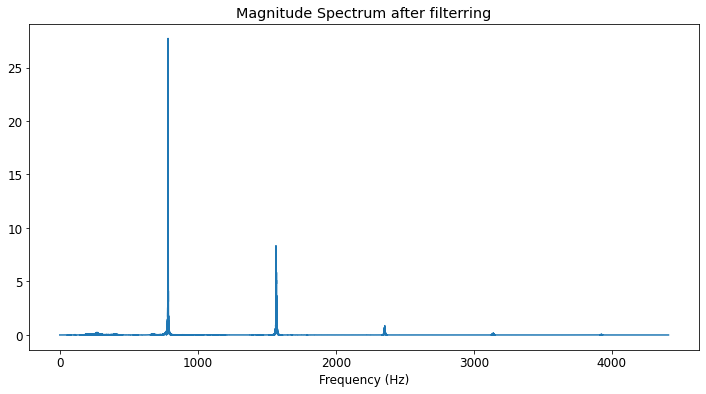

In [142]:
plot_magnitude_spectrum_trial(filterd_scale, sr1,"Magnitude Spectrum after filterring",0.1)

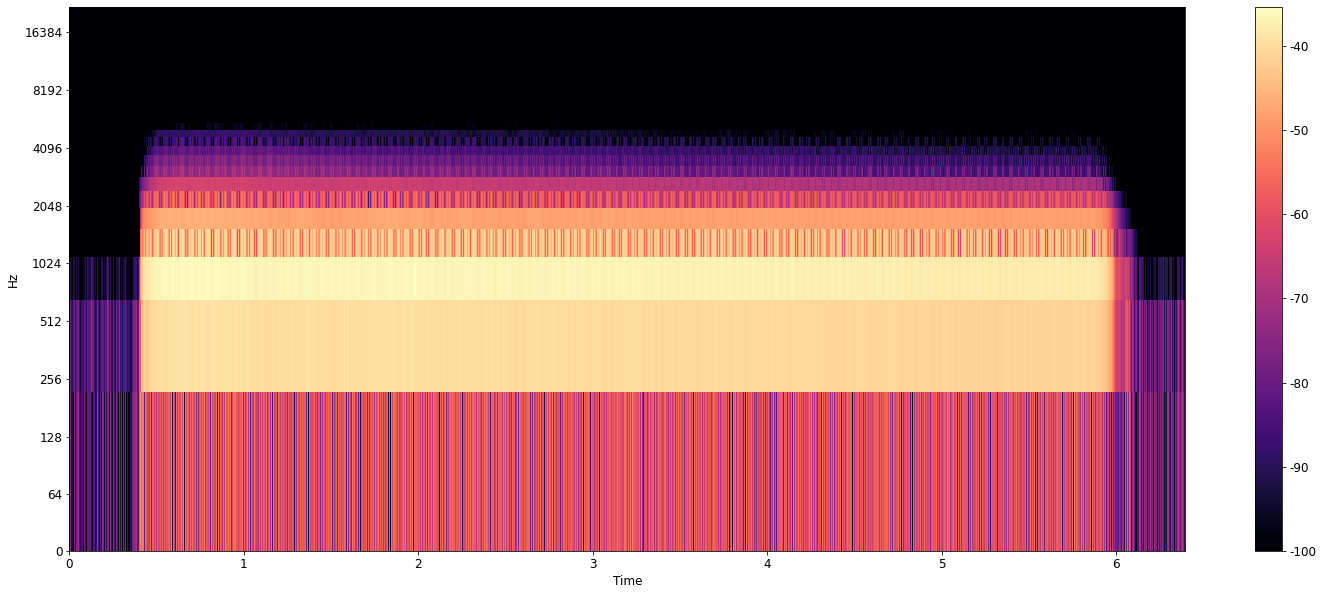

In [137]:
filterd_scale = sp.lfilter(b,a,signal)
S_scale2 = librosa.stft(filterd_scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_scale2 = np.abs(S_scale2) ** 2
Y_log_scale2 = librosa.power_to_db(Y_scale2)
def plot_spectrogram(Y, sr, hop_length, y_axis="log"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
plot_spectrogram(Y_log_scale2, sr1, HOP_SIZE, y_axis="log")

In [104]:
wavfile.write("output.wav", sr1, filterd_scale)

## Problem 4. (Chebyshev filter design)

In [121]:
Fs=720
T=1/Fs
Wp = 10*2*np.pi
Ws = 20*2*np.pi
pass_ripple = alpha
stop_ripple = 40
wp = (2/T) * np.tan(Wp/(Fs*2))
ws = (2/T) * np.tan(Ws/(Fs*2))
N, wn=sp.cheb1ord(wp, ws, pass_ripple, stop_ripple, analog=True)
print(N)
b, a = sp.cheby1(N,pass_ripple,wn, btype='low', analog=True, output='ba', fs=None)
bd, ad = sp.bilinear(b, a, fs=Fs)


5


<Figure size 864x432 with 0 Axes>

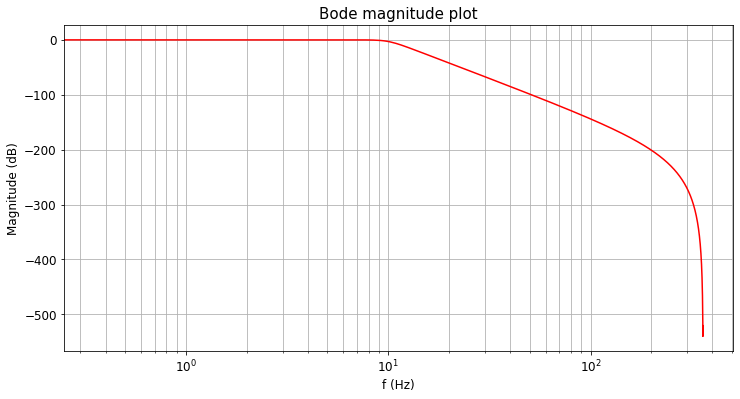

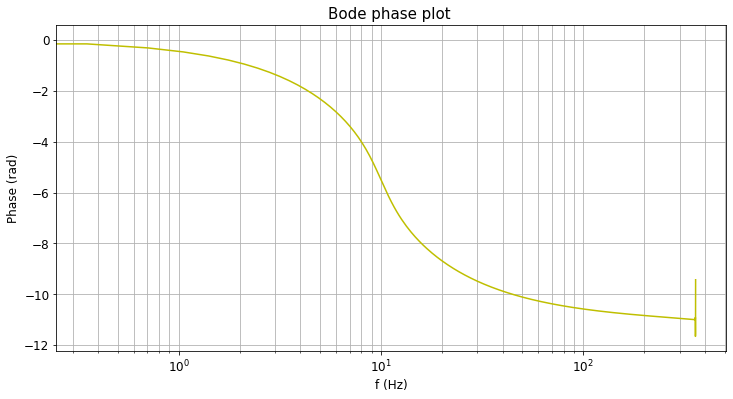

<Figure size 864x432 with 0 Axes>

In [120]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})
freqs, H = sp.freqz(bd, ad, 1024)

plt.semilogx(freqs*(Fs/(2*np.pi)), 20*np.log10(np.abs(H)),"r")
plt.xlabel('f (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Bode magnitude plot',fontsize = 15)
plt.grid(True, which='both')
plt.savefig('q4p1.png')
plt.figure()

plt.semilogx(freqs*(Fs/(2*np.pi)), np.unwrap(np.angle(H)),"y")
plt.xlabel('f (Hz)')
plt.ylabel('Phase (rad)')
plt.title('Bode phase plot ',fontsize = 15)
plt.grid(True, which='both', ls='-')
plt.savefig('q4p2.png')
plt.figure()